In [4]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [5]:
import datetime

In [6]:
import yfinance as yf
import pandas as pd

# Fetch Price

In [7]:
BNB_price = yf.download(tickers='BNB-USD', period = '2y', interval = '1d')['Adj Close']
BNB_price.head()

[*********************100%***********************]  1 of 1 completed


Date
2019-07-17    27.219601
2019-07-18    28.922812
2019-07-19    29.078394
2019-07-20    30.872244
2019-07-21    30.519543
Name: Adj Close, dtype: float64

In [8]:
BNB_price.tail()

Date
2021-07-13    308.811157
2021-07-14    309.406372
2021-07-15    315.244019
2021-07-16    302.985596
2021-07-17    300.515869
Name: Adj Close, dtype: float64

# Plots

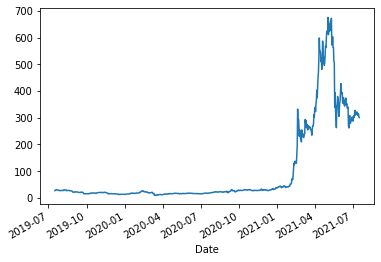

In [9]:
import matplotlib.pyplot as plt
BNB_price.plot()
plt.show()

In [10]:
BNB_daily_returns = BNB_price.pct_change().dropna(axis=0)
type(BNB_price)

pandas.core.series.Series

In [11]:
BNB_daily_cum_returns = (BNB_daily_returns +1).cumprod()-1
BNB_daily_cum_returns

Date
2019-07-18     0.062573
2019-07-19     0.068289
2019-07-20     0.134192
2019-07-21     0.121234
2019-07-22     0.125461
                ...    
2021-07-13    10.345176
2021-07-14    10.367043
2021-07-15    10.581508
2021-07-16    10.131155
2021-07-17    10.040422
Name: Adj Close, Length: 727, dtype: float64

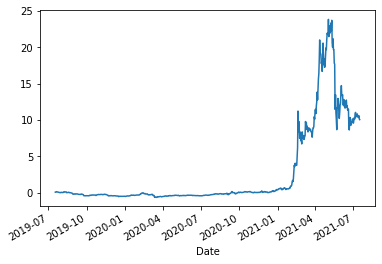

In [12]:
BNB_daily_cum_returns.plot()
plt.show()

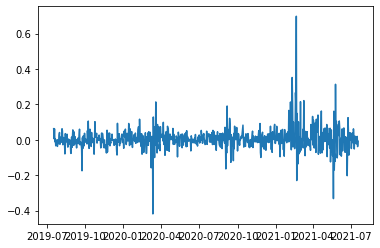

In [13]:
fig, axs = plt.subplots(1,1,gridspec_kw={'hspace':0.2,'wspace':0.1})
axs.plot(BNB_daily_returns)

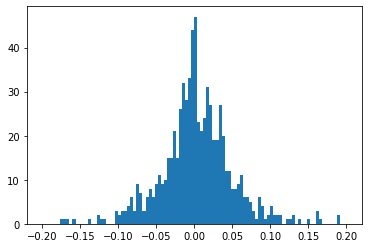

In [14]:
fig, axs = plt.subplots(1,1,gridspec_kw={'hspace':0.2,'wspace':0.1})
axs.hist(BNB_daily_returns,bins=100,range=(-0.2,0.2))
plt.show()

In [15]:
BNB_price1 = yf.download(tickers='BNB-USD', period = '4y', interval = '1d')
BNB_price1.head()
type(BNB_price1)

[*********************100%***********************]  1 of 1 completed


pandas.core.frame.DataFrame

In [16]:
BNB_daily_returns1 = BNB_price1.pct_change().dropna(axis=0)
type(BNB_daily_returns1)

pandas.core.frame.DataFrame

In [17]:
BNB_daily_returns = BNB_daily_returns1['Adj Close']
type(BNB_daily_returns)

pandas.core.series.Series

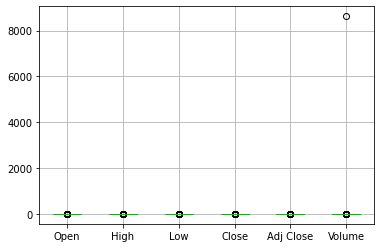

In [18]:
#fig, axs = plt.subplots(1,1,gridspec_kw={'hspace':0.2,'wspace':0.1})
BNB_daily_returns1.boxplot()#column='Adj Close')
plt.show()

# Prediction

In [19]:
pip install Prophet

     |████████████████████████████████| 65 kB 1.9 MB/s eta 0:00:011
     |████████████████████████████████| 49 kB 3.0 MB/s  eta 0:00:01
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6642917 sha256=fbb497fb3ae89e2d0c30955c07aa02f2e028a373d9e478124b8ceab2c2ac8397
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [20]:
from fbprophet import Prophet
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [21]:
import datetime as dt


In [29]:
BNB_df = yf.download(tickers='BNB-USD', period = '5y', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [30]:
modelfb = Prophet()
BNB_df = BNB_df.reset_index()
BNB_df[['ds','y']] = BNB_df[['Date','Adj Close']]
modelfb.fit(BNB_df)


In [31]:
future = modelfb.make_future_dataframe(periods=180)

In [32]:
forecast = modelfb.predict(future)

In [33]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

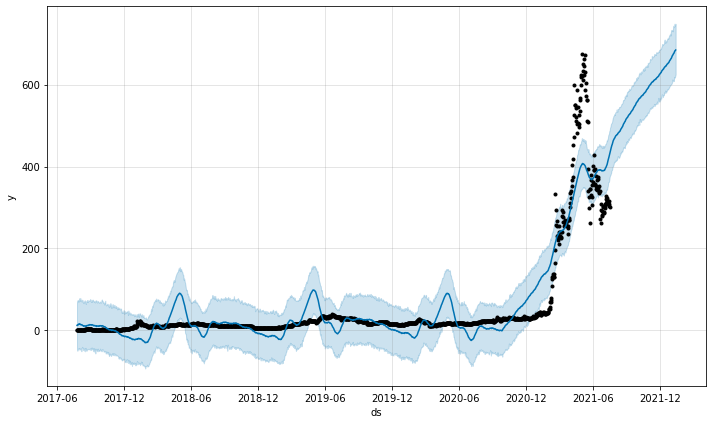

In [34]:
modelfb.plot(forecast)
plt.show()

In [35]:
import plotly.express as px
fig = px.line(forecast, x='ds', y="yhat")
fig.show()